In [1]:
import numpy as np
import math

In [2]:
with open('all.npy', 'rb') as f:
    all = np.load(f)

In [3]:
with open('effectome.npy', 'rb') as f:
    effectome = np.load(f)

In [4]:
with open('interactome.npy', 'rb') as f:
    interactome = np.load(f)

In [5]:
with open('transcriptome.npy', 'rb') as f:
    transcriptome = np.load(f)

In [6]:
with open('random.npy', 'rb') as f:
    random = np.load(f)

In [7]:
with open('proteome.npy', 'rb') as f:
    proteome = np.load(f)

In [8]:
from scipy.stats import rankdata
from scipy.stats import pearsonr

In [13]:
with open("/home/samuele/jupyter_notebooks/cluster_runs/gcn_random_searches/tra_pro_eff_int_no_hd_lat_spa_sum/bracket-0/stage-0/config-42/transcriptome-proteome-effectome-interactome.npy", 'rb') as f:
    all = np.load(f)

transcriptome_list = []
proteome_list = []
effectome_list = []
interactome_list = []
for i in range(0, 10):
    with open("/home/samuele/jupyter_notebooks/cluster_runs/gcn_random_searches/tra_no_hd_lat_spa_sum/bracket-0/stage-0/config-31/transcriptome_" + str(i) + "_.npy", 'rb') as f:
        transcriptome_list.append(np.load(f))        
    with open("/home/samuele/jupyter_notebooks/cluster_runs/gcn_random_searches/pro_hd_lat_spa_sum/bracket-0/stage-0/config-46/proteome_" + str(i) + "_.npy", 'rb') as f:
        proteome_list.append(np.load(f))
    with open("/home/samuele/jupyter_notebooks/cluster_runs/gcn_random_searches/eff_hd_lat_spa_sum/bracket-0/stage-0/config-60/effectome_" + str(i) + "_.npy", 'rb') as f:
        effectome_list.append(np.load(f))
    with open("/home/samuele/jupyter_notebooks/cluster_runs/gcn_random_searches/int_hd_lat_spa_sum/bracket-0/stage-0/config-49/interactome_" + str(i) + "_.npy", 'rb') as f:
        interactome_list.append(np.load(f))
transcriptome = np.sum(transcriptome_list, axis=0)/10
proteome = np.sum(proteome_list, axis=0)/10
effectome = np.sum(effectome_list, axis=0)/10
interactome = np.sum(interactome_list, axis=0)/10        


In [9]:
# all_ranks = abs(rankdata(all).astype(int) - len(all))
# effectome_ranks = abs(rankdata(effectome).astype(int) - len(effectome))
# interactom_ranks = abs(rankdata(interactome).astype(int) - len(interactome))
# transcriptome_ranks = abs(rankdata(transcriptome).astype(int) - len(transcriptome))
# proteome_ranks = abs(rankdata(proteome).astype(int) - len(proteome))

In [14]:
all_ranks = rankdata(all).astype(int)
effectome_ranks = rankdata(effectome).astype(int)
interactome_ranks = rankdata(interactome).astype(int) 
transcriptome_ranks = rankdata(transcriptome).astype(int)
proteome_ranks = rankdata(proteome).astype(int) 
#random_ranks = rankdata(random).astype(int) 

In [15]:
all

array([0.08965596, 0.42679685, 0.666323  , ..., 0.8349173 , 0.4473236 ,
       0.508485  ], dtype=float32)

### Retrieve the set of positives and the set of genes from publications

In [2]:
functionally_validated_host_factors = np.load("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/strong_functionally_validated_host_factors.npy")

In [3]:
functionally_validated_host_factors

array(['AAGAB', 'ACE2', 'ACTR2', 'ACTR3', 'ADAM9', 'ADAR', 'ALG11',
       'AP1B1', 'AP1G1', 'APOL1', 'ARF5', 'ARF6', 'ARID1A', 'ARPC3',
       'ARPC4', 'ATP6AP1', 'ATP6V1A', 'ATP8B1', 'ATP8B1 ', 'ATXN2L',
       'AXL', 'BAX', 'BCS1L', 'BECN1', 'BMPR1A', 'BRD2', 'BRD4', 'BSG',
       'BZW2', 'C16orf62', 'C18orf8', 'CCDC22', 'CCDC53', 'CCDC93',
       'CCT2', 'CCZ1', 'CCZ1B', 'CDKN2B', 'CHUK', 'CLEC4G', 'CLIP4',
       'CNOT4', 'CNTRL', 'COMMD10', 'COMMD2', 'COMMD3', 'COMMD3-BMI1',
       'COMMD4', 'COMMD5', 'COMMD7', 'COMMD8', 'CSDE1', 'CTSL', 'CXCL5',
       'DCAKD', 'DDX1', 'DDX42', 'DDX5', 'DNMT1', 'DPF2', 'DPH5',
       'DYRK1A', 'ECSIT', 'EDC4', 'EEF1A1', 'EIF3D', 'ELOB', 'EMC1',
       'EP300', 'ERGIC1', 'ERP44', 'ETFA', 'EWSR1', 'EXOC2', 'EXOC6',
       'EXOC8', 'EXT1', 'FAM120A', 'FASTKD5', 'FBXO27', 'FBXO33', 'FKBP8',
       'GNB1', 'GOLGA2', 'HDAC9', 'HMGB1', 'HMOX1', 'HNRNPA2B1', 'HNRNPC',
       'HNRNPH1', 'HNRNPK', 'HNRNPU', 'HNRNPUL2', 'HSPA4', 'IGF2BP1',
       'IL17RA',

In [15]:
np.savetxt("/home/samuele/jupyter_notebooks/strong_functionally_validated_host_factors.txt", functionally_validated_host_factors, delimiter=" ", newline = "\n", fmt="%s")

In [18]:
#ordered_gene_list = np.genfromtxt("/home/samuele/jupyter_notebooks/randomized_gene_list_small.txt", dtype=str)
ordered_gene_list = np.genfromtxt("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/input_data_transcriptome_proteome_effectome_interactome_2023_3_15_17_19/randomized_gene_list.txt", dtype=str)

In [22]:
with open("/home/samuele/jupyter_notebooks/randomized_gene_list.npy", "wb") as f:
    np.save(f, ordered_gene_list)

In [19]:
counter = 0
positive_indices = []
for gene in functionally_validated_host_factors:
    if gene in ordered_gene_list:
        counter +=1
        positive_indices.append(np.where(ordered_gene_list == gene)[0][0])
positive_indices = np.array(positive_indices)        

In [20]:
all_ranks[positive_indices]

array([ 8400,  8988,  9923,  9546,  9186,  9470,  7502, 10061,  9541,
        8782,  8690,  9883,  9581,  7800,  9004, 10152, 10390,  7380,
        8499,  4367,  6388,  9017,  9258, 10700,  7522,  9026, 10779,
        9839,  9303,  9479, 10587,  7684,  7127, 10020,  2011,  5779,
        6144,  8491,  8848,  9279,  8671,  8000,  8659, 10543, 10143,
        8198,  8933, 10214,  8614, 10801,  7435,  8931,  8925,  7836,
        9411,  9265, 10831, 10063,  7132, 10280, 10299,  9188,  6850,
       10177, 10780,  9157,  8563,  6367,  8819,  9021,  8243,  5078,
        3540, 10076,  8249,  9132,  9826,  9633, 10747, 10726, 10678,
       10719, 10820,  8525, 10812, 10401,  2962, 10810,  3264,  7721,
        6096,  5574,  7336,  8259,  5781,  6735,  8743,  7163,  4561,
        8791,  9685,  8560,  9988,  9662,  8763,  7008,  9997,  6733,
        9126,  7979,  7531, 10303,  9055, 10530,  8865, 10072,  9451,
        9445,  8561,  8999,  9464,  7379,  8460,  8653,  8609, 10205,
        7742,  8333,

In [4]:
#select those genes coming from publications
import pandas as pd
host_factors = pd.ExcelFile("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/host_factors_from_publications.xlsx")
host_factors_dfs = {sheet_name: host_factors.parse(sheet_name) for sheet_name in host_factors.sheet_names}
published_potential_host_factors = host_factors_dfs["host_factors"]["Gene name"].unique()

In [5]:
len(published_potential_host_factors)

5075

In [24]:
counter = 0
published_host_factors_indices = []
for gene in published_potential_host_factors:
    if gene in ordered_gene_list:
        counter +=1
        published_host_factors_indices.append(np.where(ordered_gene_list == gene)[0][0])
published_host_factors_indices = np.array(published_host_factors_indices) 

In [25]:
np.mean(interactome_ranks[published_host_factors_indices])

7135.160746003552

In [26]:
# select those genes not belonging to the functionally validated host factor list
negative_mask = np.ones(shape = len(all_ranks),dtype=bool)
negative_mask[published_host_factors_indices] = False

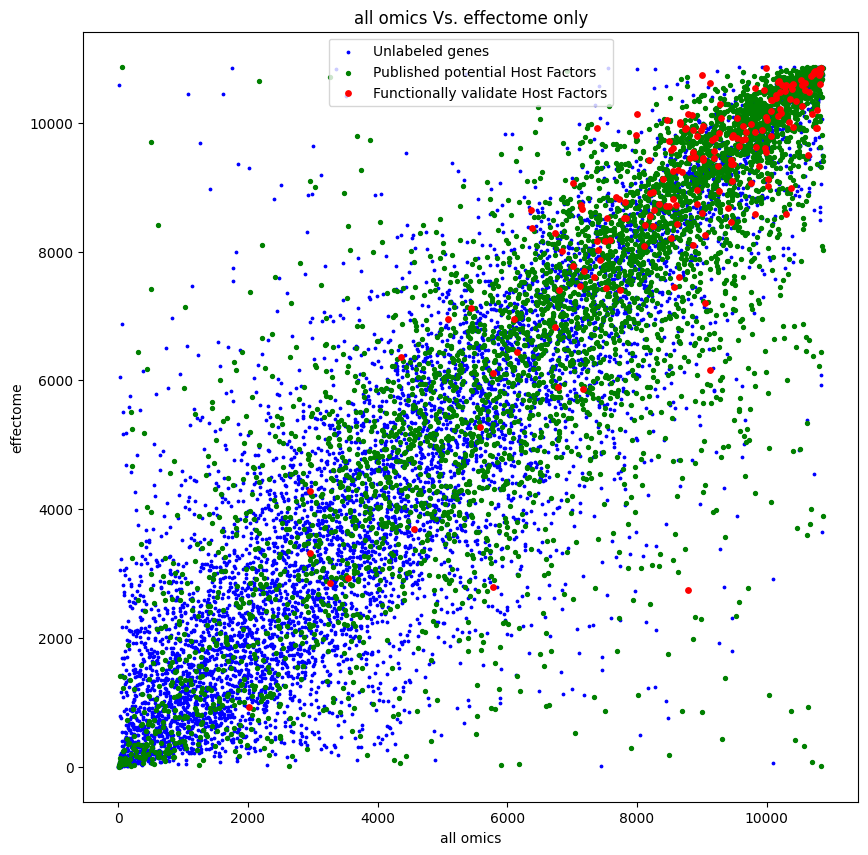

Pearsons correlation: 0.878, p-value for testing non-correlation: 0.0
mean all_ranks positive mask 8789
mean effectome_ranks positive mask 9007
mean all_ranks unlabeled mask 4325
mean effectome_ranks unlabeled mask 4360
mean all_ranks published host factors mask 7003
mean effectome_ranks published host factors mask 6953


In [28]:
import matplotlib.pyplot as plt

colors = ['b', 'r', 'g']
plt.figure(figsize = (10,10))
plt.title("all omics Vs. effectome only")

plt.scatter(all_ranks[negative_mask], effectome_ranks[negative_mask], s=3, color=colors[0], label="Unlabeled genes")
plt.scatter(all_ranks[published_host_factors_indices], effectome_ranks[published_host_factors_indices], s=8, color=colors[2], label="Published potential Host Factors")
plt.scatter(all_ranks[positive_indices], effectome_ranks[positive_indices], s=15, color=colors[1], label="Functionally validate Host Factors")
plt.xlabel("all omics")
plt.ylabel("effectome")
plt.legend(scatterpoints=1)
plt.savefig("all_effectome.png")
plt.show()

corr, p_val = pearsonr(all_ranks, effectome_ranks)
print(f'Pearsons correlation: {round(corr, 3)}, p-value for testing non-correlation: {round(p_val, 3)}')
print(f"mean all_ranks positive mask {int(np.mean(all_ranks[positive_indices]))}")
print(f"mean effectome_ranks positive mask {int(np.mean(effectome_ranks[positive_indices]))}")
print(f"mean all_ranks unlabeled mask {int(np.mean(all_ranks[negative_mask]))}")
print(f"mean effectome_ranks unlabeled mask {int(np.mean(effectome_ranks[negative_mask]))}")
print(f"mean all_ranks published host factors mask {int(np.mean(all_ranks[published_host_factors_indices]))}")
print(f"mean effectome_ranks published host factors mask {int(np.mean(effectome_ranks[published_host_factors_indices]))}")

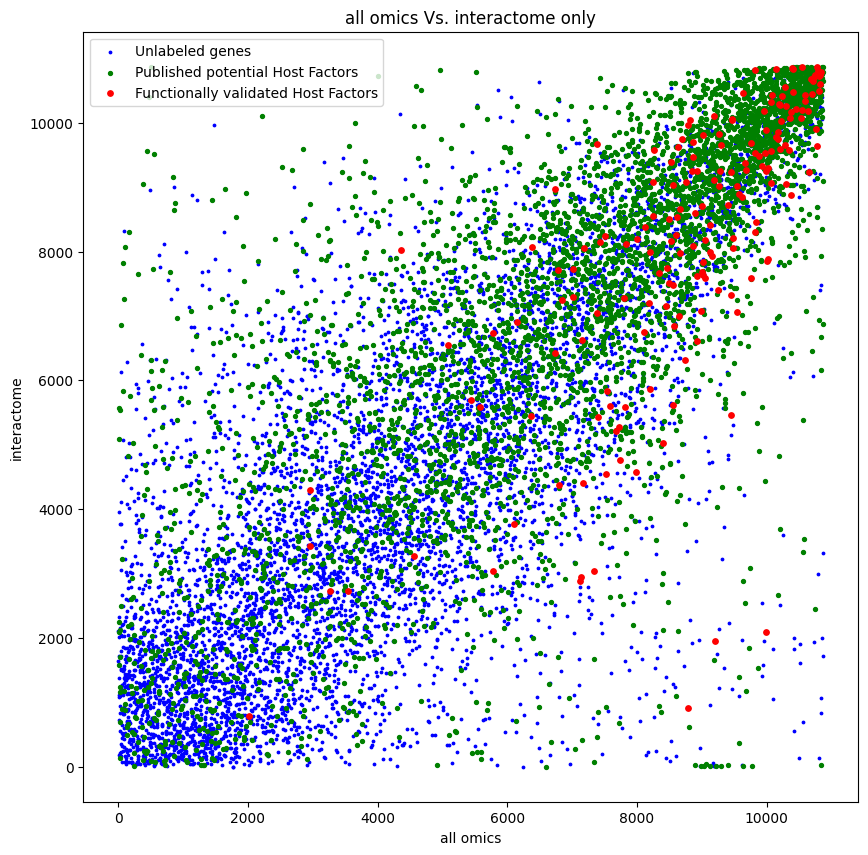

Pearsons correlation: 0.803, p-value for testing non-correlation: 0.0
mean all_ranks positive mask 8789
mean interactome_ranks positive mask 8139
mean all_ranks unlabeled mask 4325
mean interactome_ranks unlabeled mask 4231
mean all_ranks published host factors mask 7003
mean interactome_ranks published host factors mask 7135


In [29]:
colors = ['b', 'r', 'g']
plt.figure(figsize = (10,10))
plt.title("all omics Vs. interactome only")

plt.scatter(all_ranks[negative_mask], interactome_ranks[negative_mask], s=3, color=colors[0], label="Unlabeled genes")
plt.scatter(all_ranks[published_host_factors_indices], interactome_ranks[published_host_factors_indices], s=8, color=colors[2], label="Published potential Host Factors")
plt.scatter(all_ranks[positive_indices], interactome_ranks[positive_indices], s=15, color=colors[1], label="Functionally validated Host Factors")
plt.xlabel("all omics")
plt.ylabel("interactome")
plt.legend(scatterpoints=1)
plt.savefig("all_interactome.png")
plt.show()

corr, p_val = pearsonr(all_ranks, interactome_ranks)

print(f'Pearsons correlation: {round(corr, 3)}, p-value for testing non-correlation: {round(p_val, 3)}')
print(f"mean all_ranks positive mask {int(np.mean(all_ranks[positive_indices]))}")
print(f"mean interactome_ranks positive mask {int(np.mean(interactome_ranks[positive_indices]))}")
print(f"mean all_ranks unlabeled mask {int(np.mean(all_ranks[negative_mask]))}")
print(f"mean interactome_ranks unlabeled mask {int(np.mean(interactome_ranks[negative_mask]))}")
print(f"mean all_ranks published host factors mask {int(np.mean(all_ranks[published_host_factors_indices]))}")
print(f"mean interactome_ranks published host factors mask {int(np.mean(interactome_ranks[published_host_factors_indices]))}")

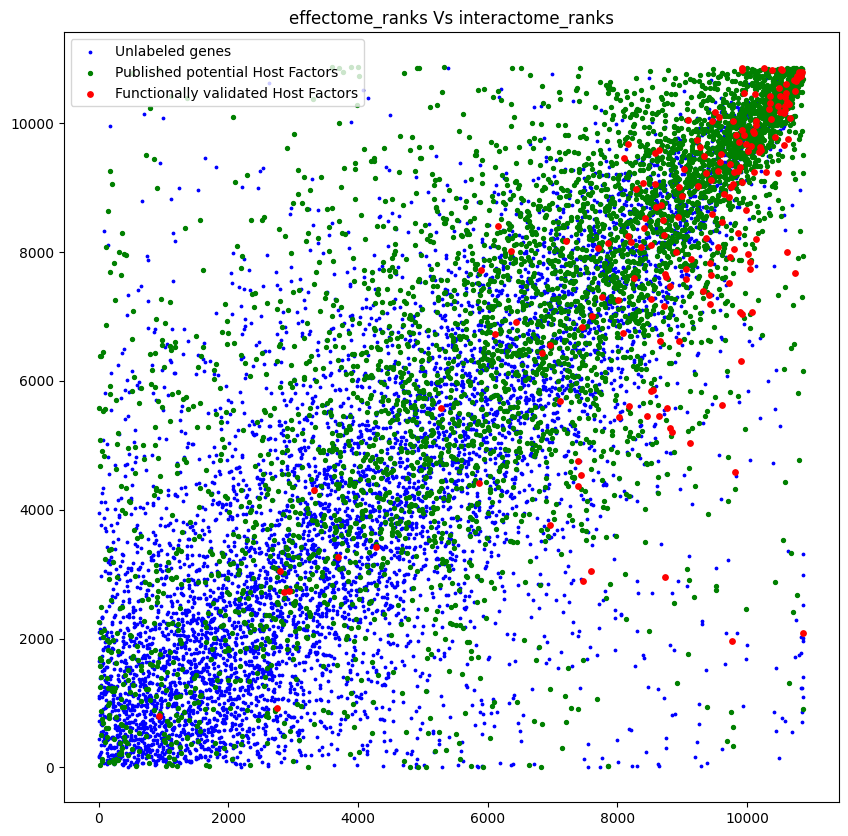

Pearsons correlation: 0.794, p-value for testing non-correlation: 0.0
mean effectome_ranks positive mask 9007
mean interactome_ranks positive mask 8139
mean effectome_ranks unlabeled mask 4360
mean interactome_ranks unlabeled mask 4231
mean effectome_ranks published host factors mask 6953
mean interactome_ranks published host factors mask 7135


In [30]:
plt.figure(figsize = (10,10))
plt.title("effectome_ranks Vs interactome_ranks")

plt.scatter(effectome_ranks[negative_mask], interactome_ranks[negative_mask], s=3, color=colors[0], label="Unlabeled genes")
plt.scatter(effectome_ranks[published_host_factors_indices], interactome_ranks[published_host_factors_indices], s=8, color=colors[2], label="Published potential Host Factors")
plt.scatter(effectome_ranks[positive_indices], interactome_ranks[positive_indices], s=15, color=colors[1], label="Functionally validated Host Factors")

plt.legend(scatterpoints=1)
plt.show()

corr, p_val = pearsonr(effectome_ranks, interactome_ranks)

print(f'Pearsons correlation: {round(corr, 3)}, p-value for testing non-correlation: {round(p_val, 3)}')
print(f"mean effectome_ranks positive mask {int(np.mean(effectome_ranks[positive_indices]))}")
print(f"mean interactome_ranks positive mask {int(np.mean(interactome_ranks[positive_indices]))}")
print(f"mean effectome_ranks unlabeled mask {int(np.mean(effectome_ranks[negative_mask]))}")
print(f"mean interactome_ranks unlabeled mask {int(np.mean(interactome_ranks[negative_mask]))}")
print(f"mean effectome_ranks published host factors mask {int(np.mean(effectome_ranks[published_host_factors_indices]))}")
print(f"mean interactome_ranks published host factors mask {int(np.mean(interactome_ranks[published_host_factors_indices]))}")

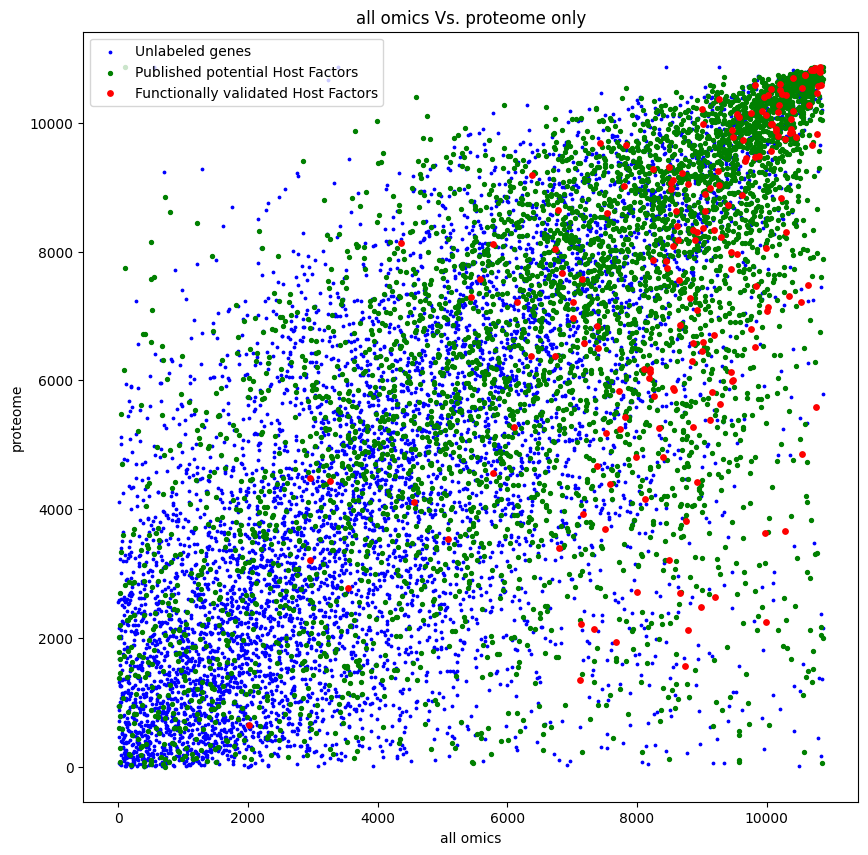

Pearsons correlation: 0.743, p-value for testing non-correlation: 0.0
mean proteome_ranks positive mask 7558
mean all_ranks positive mask 8789
mean proteome_ranks unlabeled mask 4461
mean all_ranks unlabeled mask 4325
mean proteome_ranks published host factors mask 6810
mean all_ranks published host factors mask 7003


In [31]:
plt.figure(figsize = (10,10))
plt.title("all omics Vs. proteome only")

plt.scatter(all_ranks[negative_mask], proteome_ranks[negative_mask], s=3, color=colors[0], label="Unlabeled genes")
plt.scatter(all_ranks[published_host_factors_indices], proteome_ranks[published_host_factors_indices], s=8, color=colors[2], label="Published potential Host Factors")
plt.scatter(all_ranks[positive_indices], proteome_ranks[positive_indices], s=15, color=colors[1], label="Functionally validated Host Factors")
plt.xlabel("all omics")
plt.ylabel("proteome")
plt.legend(scatterpoints=1)
plt.savefig("all_proteome.png")
plt.show()

corr, p_val = pearsonr(proteome_ranks, all_ranks)

print(f'Pearsons correlation: {round(corr, 3)}, p-value for testing non-correlation: {round(p_val, 3)}')
print(f"mean proteome_ranks positive mask {int(np.mean(proteome_ranks[positive_indices]))}")
print(f"mean all_ranks positive mask {int(np.mean(all_ranks[positive_indices]))}")
print(f"mean proteome_ranks unlabeled mask {int(np.mean(proteome_ranks[negative_mask]))}")
print(f"mean all_ranks unlabeled mask {int(np.mean(all_ranks[negative_mask]))}")
print(f"mean proteome_ranks published host factors mask {int(np.mean(proteome_ranks[published_host_factors_indices]))}")
print(f"mean all_ranks published host factors mask {int(np.mean(all_ranks[published_host_factors_indices]))}")

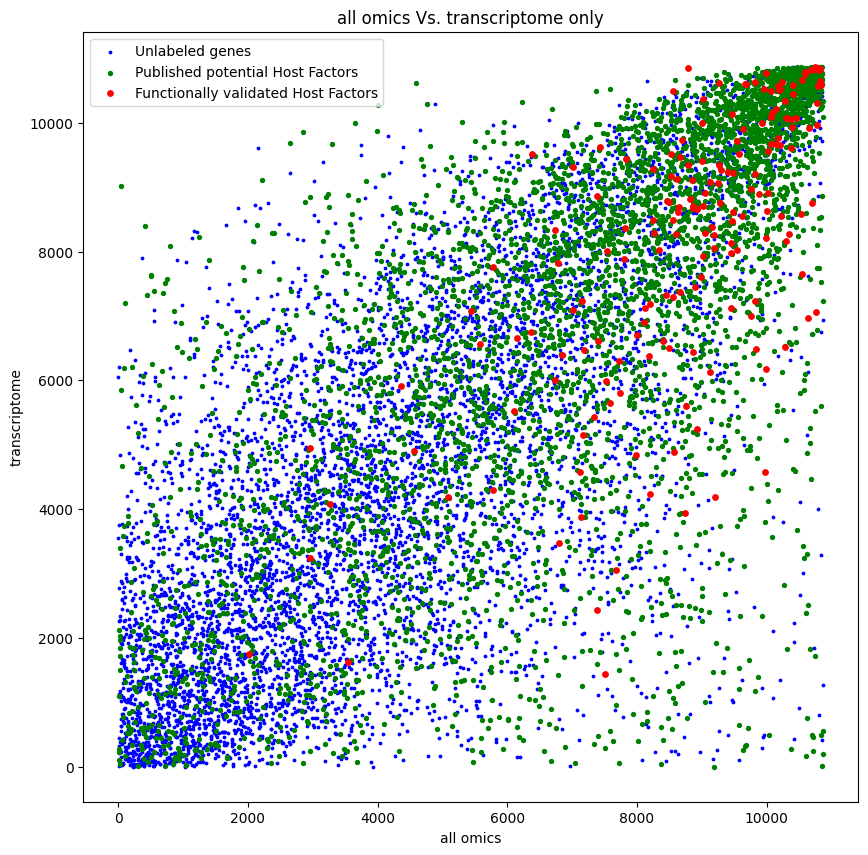

Pearsons correlation: 0.748, p-value for testing non-correlation: 0.0
mean transcriptome_ranks positive mask 8143
mean all_ranks positive mask 8789
mean transcriptome_ranks unlabeled mask 4439
mean all_ranks unlabeled mask 4325
mean transcriptome_ranks published host factors mask 6841
mean all_ranks published host factors mask 7003


In [32]:
plt.figure(figsize = (10,10))
plt.title("all omics Vs. transcriptome only")

plt.scatter(all_ranks[negative_mask], transcriptome_ranks[negative_mask], s=3, color=colors[0], label="Unlabeled genes")
plt.scatter(all_ranks[published_host_factors_indices], transcriptome_ranks[published_host_factors_indices], s=8, color=colors[2], label="Published potential Host Factors")
plt.scatter(all_ranks[positive_indices], transcriptome_ranks[positive_indices], s=15, color=colors[1], label="Functionally validated Host Factors")
plt.xlabel("all omics")
plt.ylabel("transcriptome")
plt.legend(scatterpoints=1)
plt.show()

corr, p_val = pearsonr(transcriptome_ranks, all_ranks)

print(f'Pearsons correlation: {round(corr, 3)}, p-value for testing non-correlation: {round(p_val, 3)}')
print(f"mean transcriptome_ranks positive mask {int(np.mean(transcriptome_ranks[positive_indices]))}")
print(f"mean all_ranks positive mask {int(np.mean(all_ranks[positive_indices]))}")
print(f"mean transcriptome_ranks unlabeled mask {int(np.mean(transcriptome_ranks[negative_mask]))}")
print(f"mean all_ranks unlabeled mask {int(np.mean(all_ranks[negative_mask]))}")
print(f"mean transcriptome_ranks published host factors mask {int(np.mean(transcriptome_ranks[published_host_factors_indices]))}")
print(f"mean all_ranks published host factors mask {int(np.mean(all_ranks[published_host_factors_indices]))}")

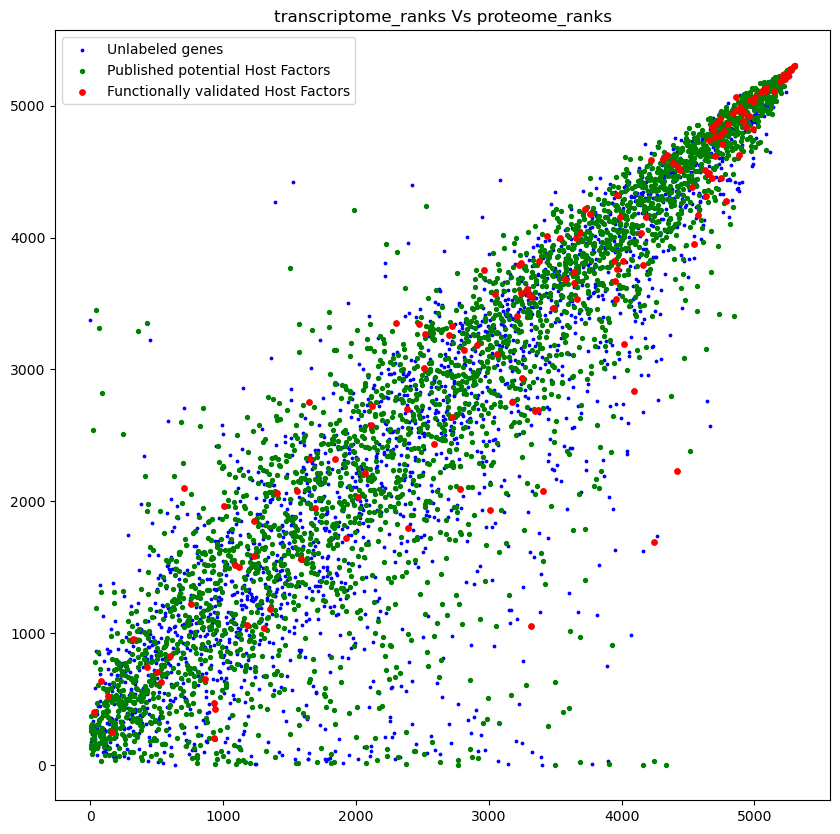

Pearsons correlation: 0.908, p-value for testing non-correlation: 0.0
mean transcriptome_ranks positive mask 3370
mean proteome_ranks positive mask 3405
mean transcriptome_ranks unlabeled mask 2507
mean proteome_ranks unlabeled mask 2453
mean transcriptome_ranks published host factors mask 2751
mean proteome_ranks published host factors mask 2788


In [162]:
plt.figure(figsize = (10,10))
plt.title("transcriptome_ranks Vs proteome_ranks")

plt.scatter(transcriptome_ranks[negative_mask], proteome_ranks[negative_mask], s=3, color=colors[0], label="Unlabeled genes")
plt.scatter(transcriptome_ranks[published_host_factors_indices], proteome_ranks[published_host_factors_indices], s=8, color=colors[2], label="Published potential Host Factors")
plt.scatter(transcriptome_ranks[positive_indices], proteome_ranks[positive_indices], s=15, color=colors[1], label="Functionally validated Host Factors")

plt.legend(scatterpoints=1)
plt.show()

corr, p_val = pearsonr(transcriptome_ranks, proteome_ranks)

print(f'Pearsons correlation: {round(corr, 3)}, p-value for testing non-correlation: {round(p_val, 3)}')
print(f"mean transcriptome_ranks positive mask {int(np.mean(transcriptome_ranks[positive_indices]))}")
print(f"mean proteome_ranks positive mask {int(np.mean(proteome_ranks[positive_indices]))}")
print(f"mean transcriptome_ranks unlabeled mask {int(np.mean(transcriptome_ranks[negative_mask]))}")
print(f"mean proteome_ranks unlabeled mask {int(np.mean(proteome_ranks[negative_mask]))}")
print(f"mean transcriptome_ranks published host factors mask {int(np.mean(transcriptome_ranks[published_host_factors_indices]))}")
print(f"mean proteome_ranks published host factors mask {int(np.mean(proteome_ranks[published_host_factors_indices]))}")

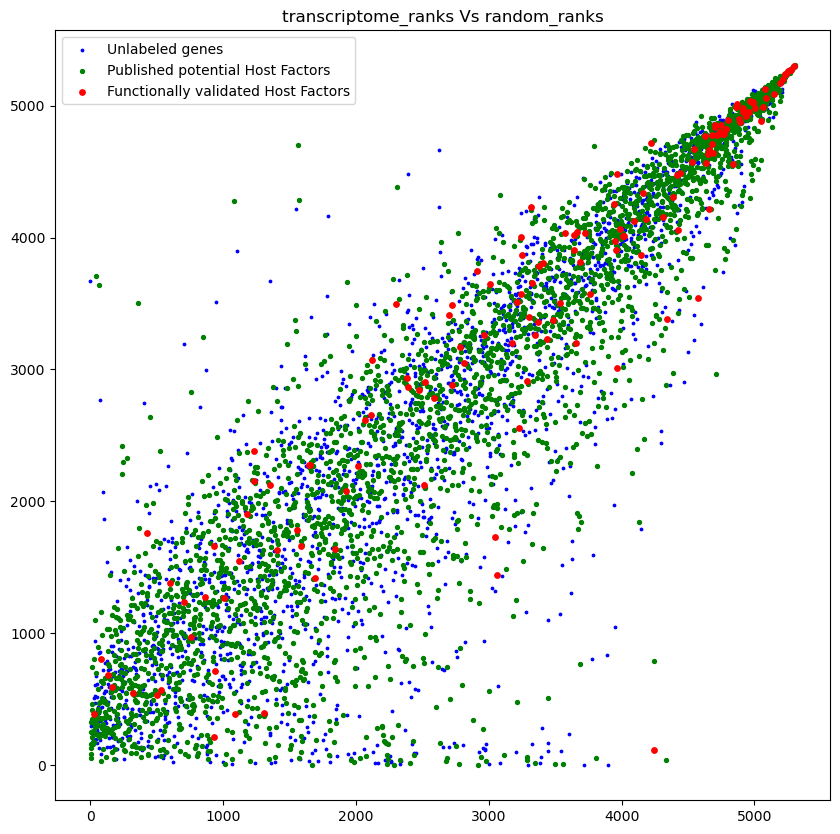

Pearsons correlation: 0.899, p-value for testing non-correlation: 0.0
mean transcriptome_ranks positive mask 3370
mean random_ranks positive mask 3466
mean transcriptome_ranks unlabeled mask 2507
mean random_ranks unlabeled mask 2502
mean transcriptome_ranks published host factors mask 2751
mean random_ranks published host factors mask 2754


In [163]:
plt.figure(figsize = (10,10))
plt.title("transcriptome_ranks Vs random_ranks")

plt.scatter(transcriptome_ranks[negative_mask], random_ranks[negative_mask], s=3, color=colors[0], label="Unlabeled genes")
plt.scatter(transcriptome_ranks[published_host_factors_indices], random_ranks[published_host_factors_indices], s=8, color=colors[2], label="Published potential Host Factors")
plt.scatter(transcriptome_ranks[positive_indices], random_ranks[positive_indices], s=15, color=colors[1], label="Functionally validated Host Factors")

plt.legend(scatterpoints=1)
plt.show()

corr, p_val = pearsonr(transcriptome_ranks, random_ranks)

print(f'Pearsons correlation: {round(corr, 3)}, p-value for testing non-correlation: {round(p_val, 3)}')
print(f"mean transcriptome_ranks positive mask {int(np.mean(transcriptome_ranks[positive_indices]))}")
print(f"mean random_ranks positive mask {int(np.mean(random_ranks[positive_indices]))}")
print(f"mean transcriptome_ranks unlabeled mask {int(np.mean(transcriptome_ranks[negative_mask]))}")
print(f"mean random_ranks unlabeled mask {int(np.mean(random_ranks[negative_mask]))}")
print(f"mean transcriptome_ranks published host factors mask {int(np.mean(transcriptome_ranks[published_host_factors_indices]))}")
print(f"mean random_ranks published host factors mask {int(np.mean(random_ranks[published_host_factors_indices]))}")

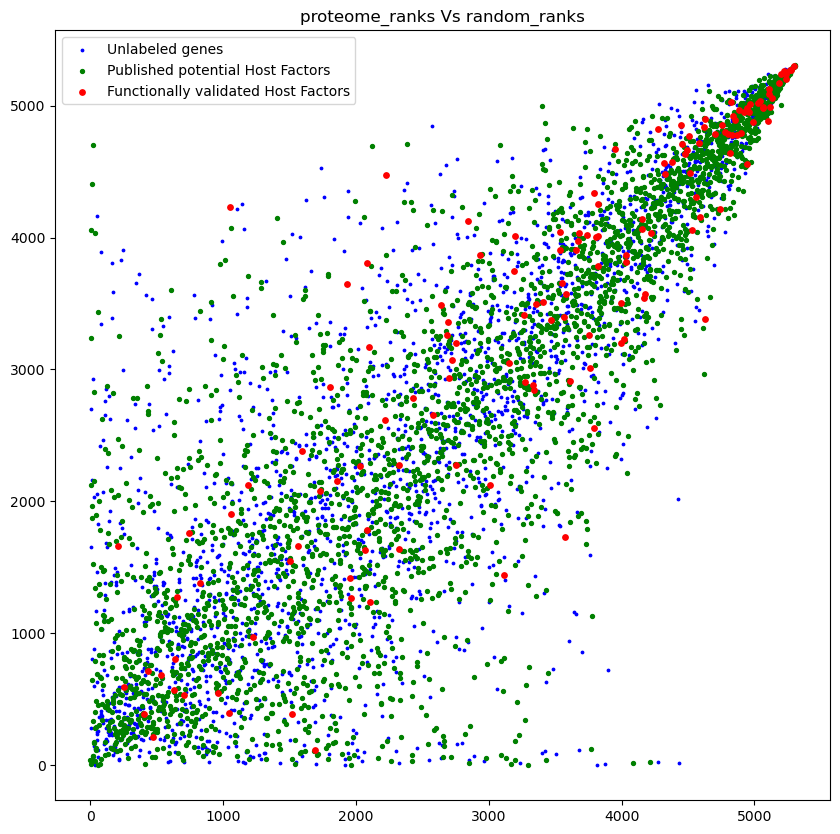

Pearsons correlation: 0.849, p-value for testing non-correlation: 0.0
mean proteome_ranks positive mask 3405
mean random_ranks positive mask 3466
mean proteome_ranks unlabeled mask 2453
mean random_ranks unlabeled mask 2502
mean proteome_ranks published host factors mask 2788
mean random_ranks published host factors mask 2754


In [164]:
plt.figure(figsize = (10,10))
plt.title("proteome_ranks Vs random_ranks")

plt.scatter(proteome_ranks[negative_mask], random_ranks[negative_mask], s=3, color=colors[0], label="Unlabeled genes")
plt.scatter(proteome_ranks[published_host_factors_indices], random_ranks[published_host_factors_indices], s=8, color=colors[2], label="Published potential Host Factors")
plt.scatter(proteome_ranks[positive_indices], random_ranks[positive_indices], s=15, color=colors[1], label="Functionally validated Host Factors")

plt.legend(scatterpoints=1)
plt.show()

corr, p_val = pearsonr(proteome_ranks, random_ranks)

print(f'Pearsons correlation: {round(corr, 3)}, p-value for testing non-correlation: {round(p_val, 3)}')
print(f"mean proteome_ranks positive mask {int(np.mean(proteome_ranks[positive_indices]))}")
print(f"mean random_ranks positive mask {int(np.mean(random_ranks[positive_indices]))}")
print(f"mean proteome_ranks unlabeled mask {int(np.mean(proteome_ranks[negative_mask]))}")
print(f"mean random_ranks unlabeled mask {int(np.mean(random_ranks[negative_mask]))}")
print(f"mean proteome_ranks published host factors mask {int(np.mean(proteome_ranks[published_host_factors_indices]))}")
print(f"mean random_ranks published host factors mask {int(np.mean(random_ranks[published_host_factors_indices]))}")

In [96]:
rank_all

array([ 589., 1952.,  660., ..., 1623.,  475., 4334.])

In [128]:
ordered_gene_list[np.where(rank_all > 5000)]

array(['ITPKC', 'ZNF451', 'FANCI', 'CRADD', 'GPRIN3', 'ARMC10', 'ERI3',
       'FADS1', 'OARD1', 'LYPLAL1', 'GALNT14', 'TCEAL4', 'INTS1',
       'SLC12A7', 'CASTOR2', 'PCK2', 'CCNYL1', 'BOD1', 'RXYLT1', 'RPP25',
       'C5orf22', 'ZBTB45', 'RNASEH2B', 'INTS6', 'MGAT1', 'CCDC71L',
       'SLC1A4', 'MUC5AC', 'LXN', 'SLC22A3', 'DPH1', 'SLC35E1', 'PPFIBP2',
       'FANCG', 'ARL2BP', 'C1orf198', 'C6orf120', 'TSEN15', 'TMEM205',
       'SLC25A36', 'PAPPA', 'INTS13', 'MLX', 'SPINDOC', 'GM2A', 'DUS1L',
       'CEP41', 'MPDU1', 'ADH5', 'LYPLA1', 'DPH6', 'PSMC3IP', 'TMSB10',
       'BORCS7', 'CREG1', 'R3HCC1', 'UROD', 'MGAT2', 'URGCP', 'AIFM2',
       'CCDC90B', 'ENOSF1', 'SCOC', 'CYBA', 'FAM234A', 'FANCL', 'TMEM59',
       'B4GALT1', 'GOLGA7', 'FAM83D', 'RAPGEF6', 'MTR', 'ACOT2',
       'FAM169A', 'BTBD11', 'TRMT2B', 'PRSS23', 'HMMR', 'CCDC134',
       'MAP7D2', 'AMZ2', 'HMGN4', 'CHPT1', 'GPC6', 'CEMIP2', 'PROSER2',
       'HLCS', 'CRLF3', 'SLC2A6', 'FADS2', 'TMEM11', 'SYNGR2', 'PTDSS2',
      

### Experimentx with the go terms semantic similarity graph

In [40]:
import pickle
with open("/home/samuele/Downloads/essential_all_data_pert_genes.pkl", "rb") as f:
    essential_genes = pickle.load(f)

In [41]:
len(essential_genes)

9976

In [42]:
with open("/home/samuele/Downloads/gene2go.pkl", "rb") as f:
    gene_to_go = pickle.load(f)

In [43]:
len(gene_to_go.keys())

67832

In [44]:
gene_to_go_list = {}
for gene in gene_to_go.keys():
    gene_to_go_list[gene] = list(gene_to_go[gene])

In [45]:
for gene in essential_genes:
    if gene not in gene_to_go.keys():
        print(gene)

AC015871.1
AC118549.1
AHSA2
ALG1L
ANKRD33B
ANKRD36
ARPC4-TTLL3
C11orf58
C11orf96
C12orf76
C14orf178
C16orf86
C16orf95
C18orf21
C19orf48
C19orf53
C19orf54
C19orf81
C1orf122
C1orf53
C1orf61
C20orf96
C21orf58
C22orf46
C4orf36
C5orf34
C6orf136
C6orf52
C6orf62
C7orf26
C8orf44
C8orf76
C8orf82
C9orf40
C9orf85
CCDC127
CCDC138
CCDC142
CCDC144NL
CCDC169
CCDC169-SOHLH2
CCDC18
CCDC34
CCDC71
CCDC97
CENPBD1
CPXCR1
CSAG1
CXorf40B
DSCR4
ERV3-1
FAM102B
FAM104B
FAM117A
FAM131A
FAM160B2
FAM177A1
FAM178B
FAM193A
FAM200B
FAM216A
FAM229A
FAM86C1
FAM89A
FAU
FBRS
GATD3A
GLOD5
GNB1L
GOLGA6L1
GPALPP1
H2AFY
HHLA3
IER5L
KBTBD3
KBTBD4
KIAA0930
KIAA1804
KRBA1
KRTAP4-7
LRRC28
LRRC42
LRRC58
LYSMD2
METTL26
MORN1
MTRNR2L1
MTRNR2L8
NEDD8-MDP1
NFE4
NME1-NME2
OAF
OR4F4
OXLD1
PAGE2B
PBDC1
PNMA8A
PROSER1
PRR14L
RBAK-RBAKDN
RBM14-RBM4
RHOXF2BB
RPL17-C18orf32
RPS10-NUDT3
RTL8C
SEM1
SNHG32
ST20-MTHFS
SZRD1
TMA7
TMEM99
TRABD
TSTD3
TTC13
TTC31
TUSC1
UBALD2
WDR53
WDR89
ZBED6CL
ZNF286B
ZNF781
ctrl


In [103]:
gene_to_go = {gene: gene_to_go[gene] for gene in essential_genes if gene in gene_to_go}

In [104]:
import json

In [168]:
gene_to_go.keys()

dict_keys(['A1BG', 'AAAS', 'AACS', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP', 'AAR2', 'AARS', 'AARS2', 'AARSD1', 'AASDH', 'AASDHPPT', 'AATF', 'ABCA7', 'ABCA8', 'ABCB10', 'ABCB6', 'ABCB7', 'ABCB8', 'ABCB9', 'ABCC1', 'ABCC10', 'ABCC4', 'ABCC5', 'ABCD3', 'ABCD4', 'ABCE1', 'ABCF1', 'ABCF2', 'ABCF3', 'ABCG1', 'ABHD10', 'ABHD11', 'ABHD12', 'ABHD13', 'ABHD14A', 'ABHD14B', 'ABHD16A', 'ABHD17A', 'ABHD17B', 'ABHD2', 'ABHD3', 'ABHD5', 'ABHD6', 'ABHD8', 'ABI1', 'ABI2', 'ABITRAM', 'ABL1', 'ABL2', 'ABO', 'ABR', 'ABRACL', 'ABRAXAS1', 'ABRAXAS2', 'ABT1', 'ACAA1', 'ACAA2', 'ACACA', 'ACAD10', 'ACAD8', 'ACAD9', 'ACADM', 'ACADS', 'ACADSB', 'ACADVL', 'ACAP2', 'ACAP3', 'ACAT1', 'ACAT2', 'ACBD3', 'ACBD5', 'ACBD6', 'ACCS', 'ACD', 'ACE', 'ACER3', 'ACHE', 'ACIN1', 'ACLY', 'ACO1', 'ACO2', 'ACOT12', 'ACOT13', 'ACOT7', 'ACOT8', 'ACOT9', 'ACOX1', 'ACP1', 'ACP2', 'ACP5', 'ACSF3', 'ACSL1', 'ACSL3', 'ACSL4', 'ACSM3', 'ACSS2', 'ACTB', 'ACTG1', 'ACTL6A', 'ACTN1', 'ACTN4', 'ACTR10', 'ACTR1A', 'ACTR1B', 'ACTR2', 'ACTR3', 'ACTR3B',

In [46]:
# import the genes whose similarity was computed using Wang method with the official R package
genes_with_similarity_values_wang = np.genfromtxt("/home/samuele/jupyter_notebooks/genes_with_similarity_values_wang_BP.txt", dtype=str)

In [47]:
genes_with_similarity_values_wang

array(['ITGA6', 'LRP1', 'LAMB1', ..., 'WAPL', 'AAR2', 'SUPT16H'],
      dtype='<U10')

In [48]:
similarity_matrix_wang = np.genfromtxt("/home/samuele/jupyter_notebooks/similarity_matrix_wang_BP.txt", dtype=float)

In [49]:
# import the genes whose similarity was computed using Wang method with the official R package
genes_with_similarity_values_resnik = np.genfromtxt("/home/samuele/jupyter_notebooks/genes_with_similarity_values_resnik_BP.txt", dtype=str)

In [50]:
similarity_matrix_resnik = np.genfromtxt("/home/samuele/jupyter_notebooks/similarity_matrix_wang_resnik_BP.txt", dtype=float)

In [51]:
np.shape(similarity_matrix_resnik)

(4779, 4779)

In [52]:
from sklearn.manifold import TSNE

In [53]:
similarity_matrix_wang_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=15).fit_transform(similarity_matrix_wang)

In [68]:
similarity_matrix_resnik_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=10).fit_transform(similarity_matrix_resnik)

In [54]:
import matplotlib.pyplot as plt

In [55]:
# retrieve positive indices in the case of Wang gosemsim
counter = 0
positive_indices_wang = []
for gene in functionally_validated_host_factors:
    if gene in genes_with_similarity_values_wang:
        counter +=1
        positive_indices_wang.append(np.where(genes_with_similarity_values_wang == gene)[0][0])

positive_indices_wang = np.array(positive_indices_wang) 
positive_mask = np.zeros(len(genes_with_similarity_values_wang))
positive_mask[positive_indices_wang] = 1
positive_mask = positive_mask.astype(bool)
counter = 0
published_host_factors_indices_wang = []
for gene in published_potential_host_factors:
    if gene in genes_with_similarity_values_wang:
        counter +=1
        published_host_factors_indices_wang.append(np.where(genes_with_similarity_values_wang == gene)[0][0])
published_host_factors_indices_wang = np.array(published_host_factors_indices_wang) 
potential_negatives_mask = np.ones(len(genes_with_similarity_values_wang))
potential_negatives_mask[published_host_factors_indices_wang] = 0
potential_negatives_mask = potential_negatives_mask.astype(bool)

potential_positives = potential_negatives_mask | positive_mask
potential_positives = ~potential_positives

In [56]:
sum(potential_negatives_mask)

1921

In [57]:
sum(positive_mask)

131

In [58]:
np.sum(np.logical_or(potential_positives, positive_mask)) - np.sum(potential_positives)

131

In [59]:
np.sum(np.logical_and(potential_positives, positive_mask))

0

In [60]:
np.sum(np.logical_or(potential_negatives_mask, potential_positives))

4708

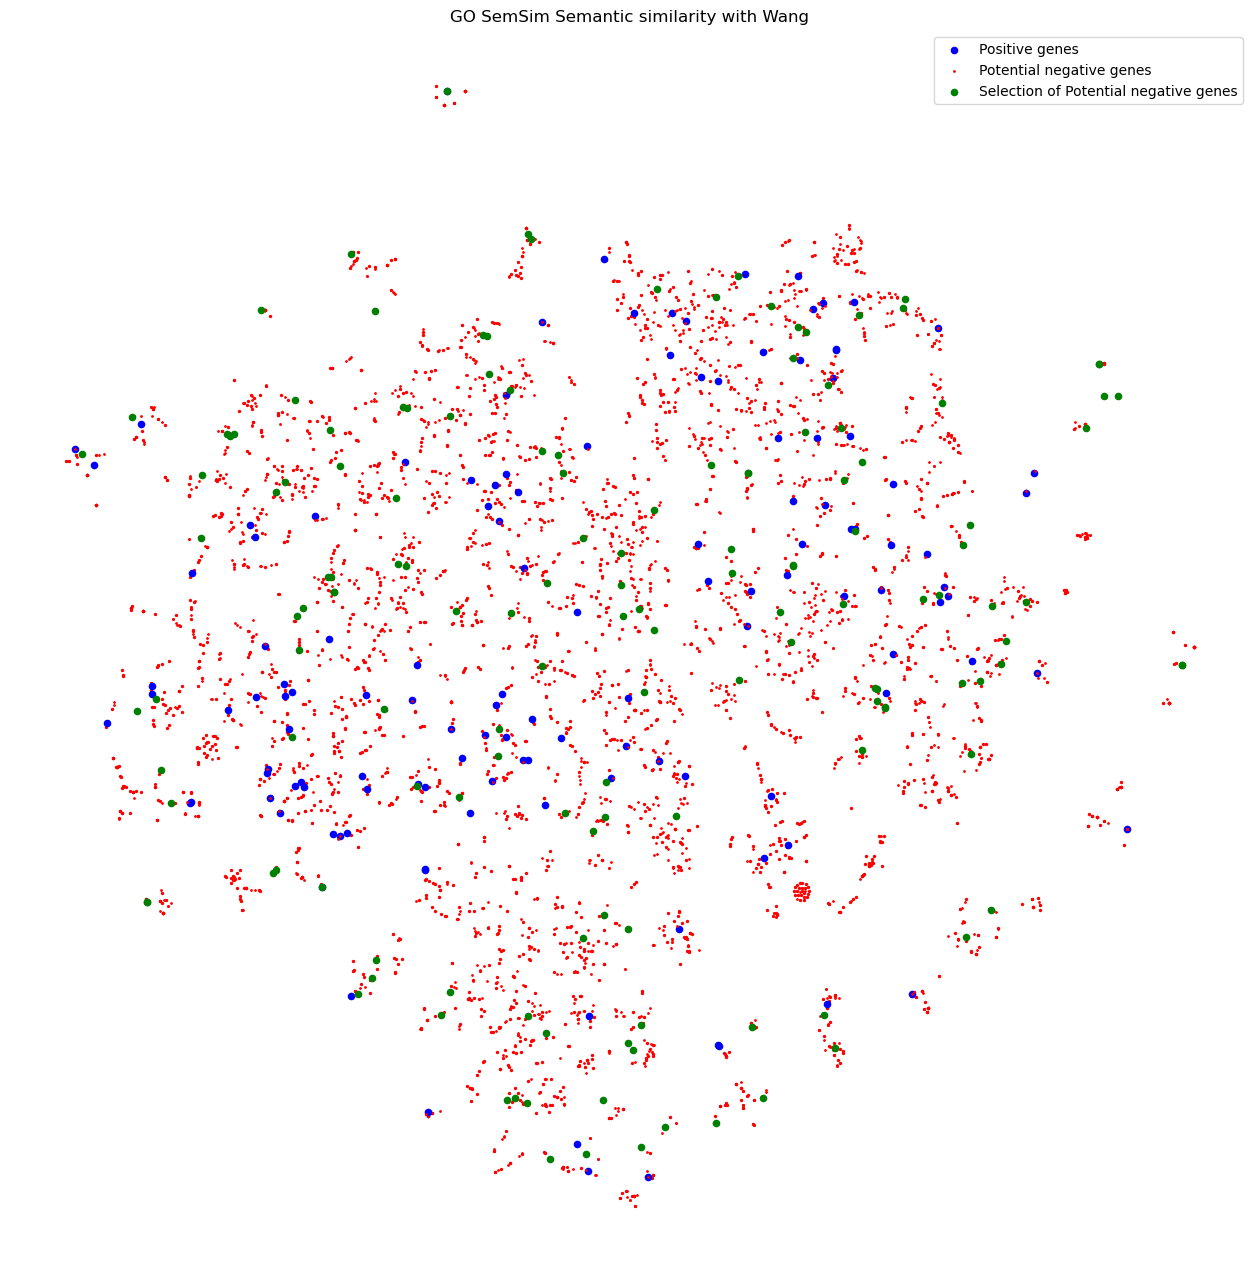

In [62]:
import random
colors = ['b', 'r', 'g', 'c']

plt.figure(figsize=(16,16))
plt.scatter(similarity_matrix_wang_embedded[potential_positives,0], similarity_matrix_wang_embedded[potential_positives,1], s=2, color=colors[1])
plt.scatter(similarity_matrix_wang_embedded[positive_mask,0], similarity_matrix_wang_embedded[positive_mask,1], s=20, color=colors[0], label="Positive genes")
plt.scatter(similarity_matrix_wang_embedded[potential_negatives_mask,0], similarity_matrix_wang_embedded[potential_negatives_mask,1], s=1, color=colors[1], label="Potential negative genes")
potential_negatives_indices_selection = random.choices(np.where(potential_negatives_mask == True)[0], k=150)
plt.scatter(similarity_matrix_wang_embedded[potential_negatives_indices_selection,0], similarity_matrix_wang_embedded[potential_negatives_indices_selection,1], s=20, color=colors[2], label="Selection of Potential negative genes")

plt.legend(scatterpoints=1)
plt.title("GO SemSim Semantic similarity with Wang")
plt.axis('off')
plt.savefig("/home/samuele/jupyter_notebooks/wang_gosemsim.png")
plt.show()

In [71]:
# retrieve positive indices in the case of Resnik gosemsim
counter = 0
positive_indices_resnik = []
for gene in functionally_validated_host_factors:
    if gene in genes_with_similarity_values_resnik:
        counter +=1
        positive_indices_resnik.append(np.where(genes_with_similarity_values_resnik == gene)[0][0])

positive_indices_resnik = np.array(positive_indices_resnik) 
positive_mask = np.zeros(len(genes_with_similarity_values_resnik))
positive_mask[positive_indices_resnik] = 1
positive_mask = positive_mask.astype(bool)
counter = 0
published_host_factors_indices_resnik = []
for gene in published_potential_host_factors:
    if gene in genes_with_similarity_values_resnik:
        counter +=1
        published_host_factors_indices_resnik.append(np.where(genes_with_similarity_values_resnik == gene)[0][0])
published_host_factors_indices_resnik = np.array(published_host_factors_indices_resnik) 
potential_negatives_mask = np.ones(len(genes_with_similarity_values_resnik))
potential_negatives_mask[published_host_factors_indices_resnik] = 0
potential_negatives_mask = potential_negatives_mask.astype(bool)

potential_positives = potential_negatives_mask | positive_mask
potential_positives = ~potential_positives

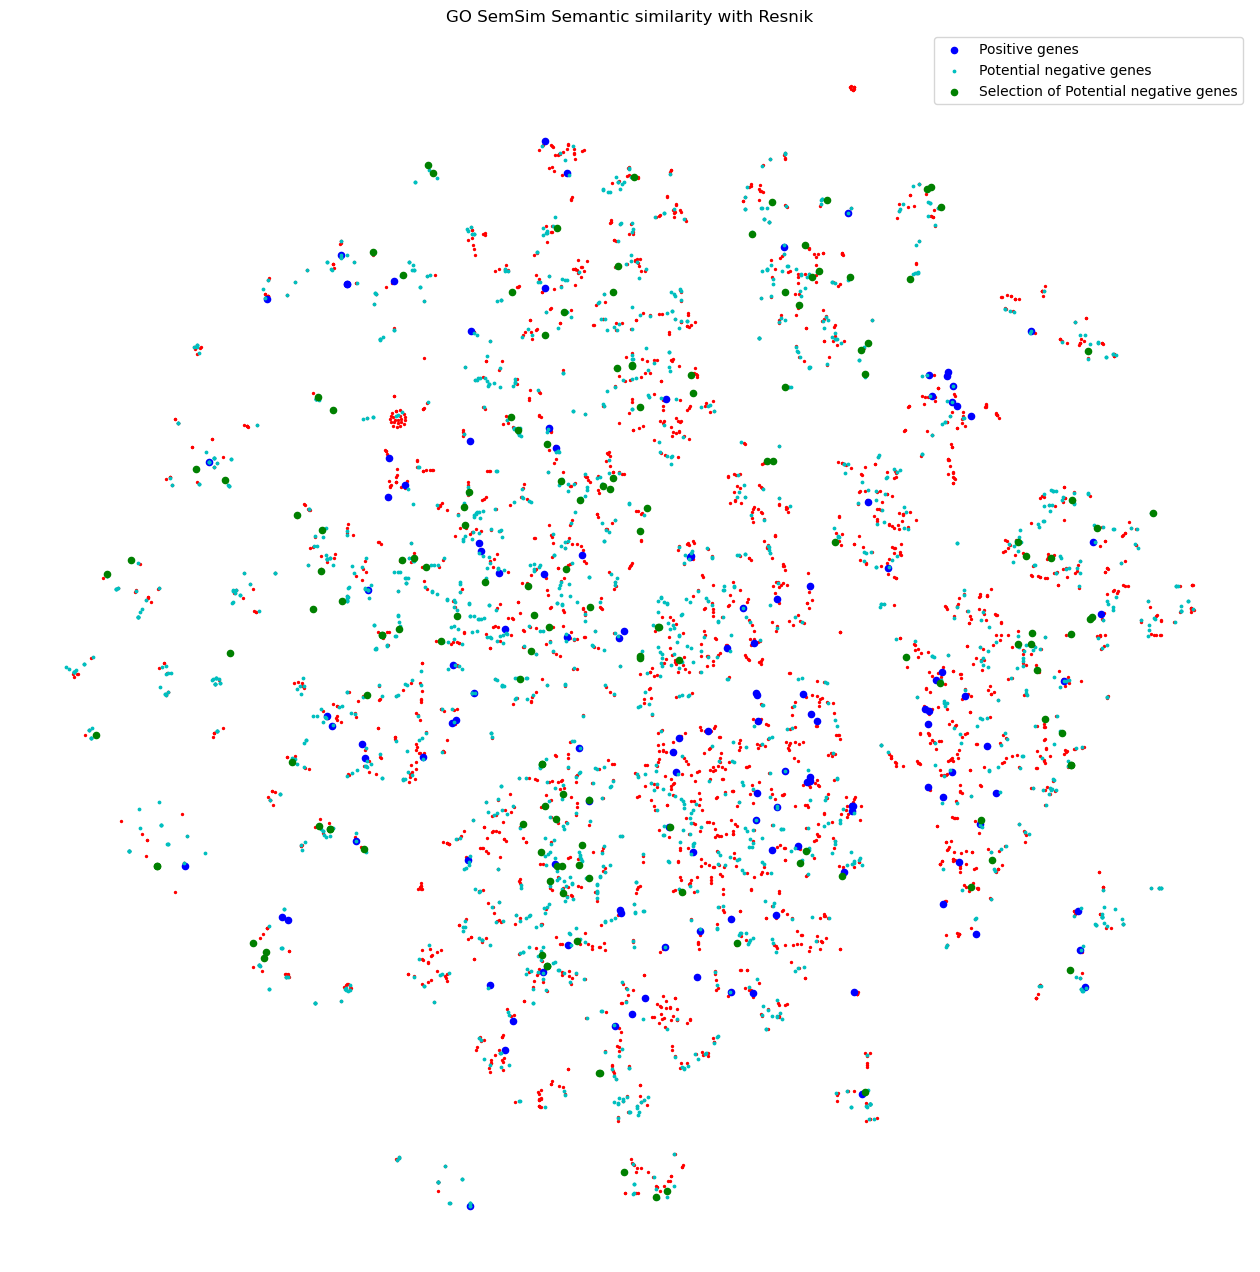

In [72]:
colors = ['b', 'r', 'g', 'c']

plt.figure(figsize=(16,16))
plt.scatter(similarity_matrix_resnik_embedded[potential_positives,0], similarity_matrix_resnik_embedded[potential_positives,1], s=2, color=colors[1])
plt.scatter(similarity_matrix_resnik_embedded[positive_mask,0], similarity_matrix_resnik_embedded[positive_mask,1], s=20, color=colors[0], label="Positive genes")
plt.scatter(similarity_matrix_resnik_embedded[potential_negatives_mask,0], similarity_matrix_resnik_embedded[potential_negatives_mask,1], s=3, color=colors[3], label="Potential negative genes")
potential_negatives_indices_selection = random.choices(np.where(potential_negatives_mask == True)[0], k=150)
plt.scatter(similarity_matrix_resnik_embedded[potential_negatives_indices_selection,0], similarity_matrix_resnik_embedded[potential_negatives_indices_selection,1], s=20, color=colors[2], label="Selection of Potential negative genes")

plt.legend(scatterpoints=1)
plt.title("GO SemSim Semantic similarity with Resnik")
plt.axis('off')
plt.show()

### Improve positive mapping

In [44]:
# case with no imputed values
randomized_gene_list = np.genfromtxt( "/home/samuele/jupyter_notebooks/randomized_gene_list_big_string.txt", dtype=str)
positive_host_factors = np.load("/home/samuele/jupyter_notebooks/strong_functionally_validated_host_factors.npy")

In [45]:
print("Genes not found with the current ID mapping in string")
print(len(randomized_gene_list))
not_found_genes = []
for gene in positive_host_factors:
    if gene not in randomized_gene_list:
        not_found_genes.append(gene)

print(len(not_found_genes))        

Genes not found with the current ID mapping in string
11171
16


In [46]:
# case with all imputed values
randomized_gene_list = np.genfromtxt( "/home/samuele/jupyter_notebooks/randomized_gene_list_big_multiscale.txt", dtype=str)

In [48]:
print("Genes not found with the current ID mapping in multiscale")
print(len(randomized_gene_list))
not_found_genes = []
for gene in positive_host_factors:
    if gene not in randomized_gene_list:
        not_found_genes.append(gene)

print(len(not_found_genes))
print(not_found_genes)  

Genes not found with the current ID mapping in multiscale
11040
16
['ATP8B1 ', 'C16orf62', 'C18orf8', 'CCDC53', 'CDKN2B', 'CLEC4G', 'COMMD3-BMI1', 'CXCL5', 'HDAC9', 'KIAA0196', 'KIAA1033', 'MINAR1', 'NFE2', 'TMPRSS13', 'TMPRSS2', 'TP73']


In [54]:
import pandas as pd
positive_host_factors_remapped = pd.read_csv("/home/samuele/jupyter_notebooks/SARSCoV2_host_factors_msci.txt", sep="\t")["Gene.name"].values
len(positive_host_factors_remapped)

193

In [55]:
print("Genes not found with the new ID mapping in multiscale")
print(len(randomized_gene_list))
not_found_genes = []
for gene in positive_host_factors:
    if gene not in randomized_gene_list:
        not_found_genes.append(gene)

print(len(not_found_genes))
print(not_found_genes)  

Genes not found with the new ID mapping in multiscale
11040
16
['ATP8B1 ', 'C16orf62', 'C18orf8', 'CCDC53', 'CDKN2B', 'CLEC4G', 'COMMD3-BMI1', 'CXCL5', 'HDAC9', 'KIAA0196', 'KIAA1033', 'MINAR1', 'NFE2', 'TMPRSS13', 'TMPRSS2', 'TP73']


In [84]:
uniprot_file_path = "/home/samuele/jupyter_notebooks/HUMAN_9606_idmapping.dat"

uniprot_dat_file_content = [i.strip().split() for i in open(uniprot_file_path).readlines()]
gene_names_and_synonym = []
for item in uniprot_dat_file_content:
    if (item[1] == "Gene_Name") or (item[1] == "Gene_Synonym"):
        gene_names_and_synonym.append(item)               

In [136]:
gene_names_and_synonym[100:120]

[['P52209', 'Gene_Synonym', 'PGDH'],
 ['O95336', 'Gene_Name', 'PGLS'],
 ['P05408', 'Gene_Name', 'SCG5'],
 ['P05408', 'Gene_Synonym', 'SGNE1'],
 ['P36639', 'Gene_Name', 'NUDT1'],
 ['P36639', 'Gene_Synonym', 'MTH1'],
 ['P0DKL9', 'Gene_Name', 'ARL14EPL'],
 ['Q8IZ83', 'Gene_Name', 'ALDH16A1'],
 ['Q676U5', 'Gene_Name', 'ATG16L1'],
 ['Q676U5', 'Gene_Synonym', 'APG16L'],
 ['Q8NAA4', 'Gene_Name', 'ATG16L2'],
 ['Q8NAA4', 'Gene_Synonym', 'WDR80'],
 ['P02763', 'Gene_Name', 'ORM1'],
 ['P02763', 'Gene_Synonym', 'AGP1'],
 ['P19652', 'Gene_Name', 'ORM2'],
 ['P19652', 'Gene_Synonym', 'AGP2'],
 ['P20848', 'Gene_Name', 'SERPINA2'],
 ['P20848', 'Gene_Synonym', 'ARGS'],
 ['P20848', 'Gene_Synonym', 'ATR'],
 ['P20848', 'Gene_Synonym', 'PIL']]

In [86]:
uniprot_names = []
entities = []
entities_ids = []
for item in gene_names_and_synonym:
    uniprot_names.append(item[0])
    entities.append(item[1])
    entities_ids.append(item[2])

In [88]:
uniprot_names = np.array(uniprot_names)
entities = np.array(entities)
entities_ids = np.array(entities_ids)

In [ ]:
uniprot_uniques_names = np.unique(uniprot_names)

In [144]:
gene_synonyms = entities_ids[np.where(entities == "Gene_Synonym")[0]]
uniprot_names_corresponding_to_gene_synonym = uniprot_names[np.where(entities == "Gene_Synonym")[0]]

In [158]:
filtered_positive_host_factors = []
for host_factor in positive_host_factors:
    if host_factor not in gene_synonyms:
        filtered_positive_host_factors.append(host_factor)
    else:
        corresponding_uniprot_name =  uniprot_names_corresponding_to_gene_synonym[np.where(gene_synonyms == host_factor)[0][0]]    
        uniprot_indices = np.where(uniprot_names == corresponding_uniprot_name)[0]
        for index in uniprot_indices:
            if entities[index] == "Gene_Name":
                filtered_positive_host_factors.append(entities_ids[index])

filtered_positive_host_factors = np.array(filtered_positive_host_factors)

In [161]:
print("Genes not found with the current ID mapping -> check gene sinonym in uniprot!!!!")
not_found_genes = []
for gene in filtered_positive_host_factors:
    if gene not in randomized_gene_list:
        not_found_genes.append(gene)

print(len(not_found_genes)) 

Genes not found with the current ID mapping -> check gene sinonym in uniprot!!!!
52


In [ ]:
def map_functional_positives_to_used_gene_names(uniprot_file_path :str, functional_positives, used_gene_names):
    
    uniprot_file_path = "/home/samuele/jupyter_notebooks/HUMAN_9606_idmapping.dat"
    
    uniprot_dat_file_content = [i.strip().split() for i in open(uniprot_file_path).readlines()]
    gene_names_and_synonym = []
    for item in uniprot_dat_file_content:
        if (item[1] == "Gene_Name") or (item[1] == "Gene_Synonym"):
            gene_names_and_synonym.append(item)  